<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/notebooks/022_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ Funkcje Aktywacji: Iskra Inteligencji

Wyobraź sobie neuron jako pracownika biurowego.
Dostaje stos dokumentów (liczby na wejściu), sumuje je i... co dalej?

1.  **Bez Funkcji Aktywacji (Linear):** Pracownik po prostu podaje sumę dalej.
    *   Problem: Jeśli połączysz 100 takich pracowników, to nadal wykonują tylko dodawanie. Nie potrafią rozwiązać skomplikowanych problemów (jak XOR). Sieć jest płaska.
    
2.  **Z Funkcją Aktywacji (Non-linear):** Pracownik patrzy na sumę i podejmuje decyzję.
    *   *"Jeśli suma jest ujemna, wyrzucam do kosza (0). Jeśli dodatnia, wysyłam dalej."*
    *   To wprowadza **nieliniowość**. Dzięki temu sieć może wyginać przestrzeń i rozumieć kształty.

Poznamy trzech króli aktywacji: **Sigmoid**, **ReLU** i **Softmax**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definiujemy funkcje matematycznie
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generujemy dane do wykresu (oś X od -10 do 10)
x = np.linspace(-5, 5, 100)

print("Funkcje zdefiniowane. Teraz zobaczmy ich kształt.")

Funkcje zdefiniowane. Teraz zobaczmy ich kształt.


## 1. Sigmoid (Staruszek)

Wzór: $\frac{1}{1 + e^{-x}}$
Zmienia każdą liczbę w zakres **(0, 1)**.

*   **Zaleta:** Idealny do prawdopodobieństwa (np. "Na 0.8 to jest kot").
*   **Wada:** "Zabija" duże liczby. Czy wpiszesz 100, czy 1000000, wynik to prawie 1.0. To sprawia, że sieć przestaje się uczyć (problem *Vanishing Gradient*). Dziś używany głównie na samym końcu sieci.

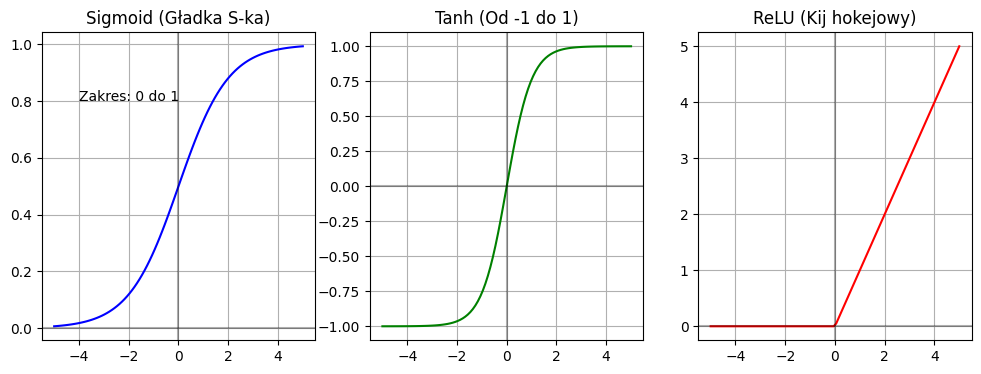

In [2]:
plt.figure(figsize=(12, 4))

# Wykres Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x), 'b')
plt.title("Sigmoid (Gładka S-ka)")
plt.grid(True)
plt.axvline(0, color='k', alpha=0.3)
plt.axhline(0, color='k', alpha=0.3)
plt.text(-4, 0.8, "Zakres: 0 do 1", fontsize=10)

# Wykres Tanh (Kuzyn Sigmoida)
plt.subplot(1, 3, 2)
plt.plot(x, tanh(x), 'g')
plt.title("Tanh (Od -1 do 1)")
plt.grid(True)
plt.axvline(0, color='k', alpha=0.3)
plt.axhline(0, color='k', alpha=0.3)

# Wykres ReLU (Król Deep Learningu)
plt.subplot(1, 3, 3)
plt.plot(x, relu(x), 'r')
plt.title("ReLU (Kij hokejowy)")
plt.grid(True)
plt.axvline(0, color='k', alpha=0.3)
plt.axhline(0, color='k', alpha=0.3)

plt.show()

## 2. ReLU (Rectified Linear Unit)

Wzór: `max(0, x)`
Zasada: "Jeśli ujemne -> Zero. Jeśli dodatnie -> Bez zmian".

*   **Dlaczego to Król?**
    Jest banalnie prosty w obliczeniach (komputer kocha zera).
    Nie "spłaszcza" dużych liczb (jak Sigmoid). Jeśli sygnał jest silny (np. 1000), ReLU przekazuje 1000. Dzięki temu wielkie sieci (jak GPT) mogą się szybko uczyć.
    To właśnie `activation='relu'` uratowało nas w problemie XOR.

## 3. Softmax (Decydent)

Tego używamy **tylko w ostatniej warstwie**, gdy mamy wiele klas (np. Kot, Pies, Chomik).
Zamienia surowe punkty (Logity) na procenty, które sumują się do 100%.

Pamiętasz notatnik o **Temperaturze**? Tam właśnie używaliśmy Softmax!

--- SOFTMAX W AKCJI ---
Surowe punkty (Logits): [2.  1.  0.1]
Prawdopodobieństwa:     [0.65900114 0.24243297 0.09856589]
Suma: 1.0 (czyli 100%)


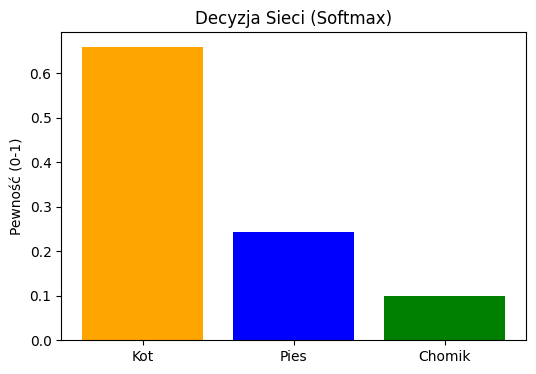

In [3]:
# Symulacja: Sieć oceniła zdjęcie i wypluła surowe punkty (Logity)
logits = np.array([2.0, 1.0, 0.1]) 
klasy = ['Kot', 'Pies', 'Chomik']

def softmax(x):
    e_x = np.exp(x - np.max(x)) # Odejmujemy max dla stabilności
    return e_x / e_x.sum()

probs = softmax(logits)

print("--- SOFTMAX W AKCJI ---")
print(f"Surowe punkty (Logits): {logits}")
print(f"Prawdopodobieństwa:     {probs}")
print(f"Suma: {sum(probs):.1f} (czyli 100%)")

plt.figure(figsize=(6, 4))
plt.bar(klasy, probs, color=['orange', 'blue', 'green'])
plt.title("Decyzja Sieci (Softmax)")
plt.ylabel("Pewność (0-1)")
plt.show()

## 🧠 Podsumowanie: Której użyć?

To jest prosta ściąga dla inżyniera AI:

1.  **W środku sieci (Warstwy ukryte):**
    *   Używaj **ReLU** (lub jego nowszych wersji jak Leaky ReLU, GELU).
    *   Jest szybki i skuteczny. Sigmoida w środku używa się rzadko (tylko w specyficznych architekturach jak LSTM).

2.  **Na samym końcu (Warstwa wyjściowa):**
    *   Jeśli przewidujesz **Tak/Nie** (np. Spam/Ham): Użyj **Sigmoid** (wynik 0-1).
    *   Jeśli wybierasz **jedną z wielu opcji** (np. Kot/Pies/Ptak): Użyj **Softmax**.
    *   Jeśli przewidujesz **liczbę** (np. Cenę mieszkania): Nie używaj niczego (Linear).

**Tu jest haczyk.**
W GPT i Transformerach używa się często **GELU** lub **Swish**. To takie "zaokrąglone ReLU". Ale zasada jest ta sama – chodzi o to, żeby zerować słabe sygnały i przepuszczać silne.